In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolor
from matplotlib.ticker import FormatStrFormatter
import sys
sys.path.append("/Volumes/pdoubraw-1/repos/")
sys.path.append("C:/Users/krydalch/Documents/Repos/")
from datatools import wfip2
from datatools.remote_sensing import scintec_profiler

In [3]:
fs = 18
plt.rc("font",size=fs)

# read in the sodar data

In [4]:
sodar_path = "/Volumes/pdoubraw-1/repos/jet/data/"
sodar_path = "C:\\Users\\krydalch\\Desktop\\MetMastData\\SODAR\\"

df = wfip2.read_dir(dpath=sodar_path, reader=scintec_profiler, ext='mnd')
df = df.set_index("datetime")
# Remove Faulty Data
df = df.replace("99.99",np.nan)
df = df.replace("999.9",np.nan)

df['wind speed'] = df['wind speed'].astype(float)

In [5]:
time_vs_height = df[["wind speed","height"]].reset_index().set_index(["datetime","height"]).unstack().astype("float")
time_vs_height.index = time_vs_height.index.tz_localize("UTC")

# get the desired profile

In [6]:
hour   = 14
minute = 40

start = pd.Timestamp(2017,2,17,hour,minute)
end   = pd.Timestamp(2017,2,17,hour,minute+9)
times = pd.DatetimeIndex(start=start,end=end,freq='10min',name='datetime').tz_localize('UTC')
idx   = times[0]

profile = time_vs_height.loc[idx]
z       = profile.index.get_level_values(1)
u       = profile.values

# If there are missing values, interpolate
u_nona = u[~np.isnan(u)]
z_nona = z[~np.isnan(u)]

z_int = z.copy()
u_int = np.interp(z_int,z_nona,u_nona)


C:\Users\krydalch\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  


# Get mixed sodar data

In [7]:
hour   = 18
minute = 20

start = pd.Timestamp(2017,2,17,hour,minute)
end   = pd.Timestamp(2017,2,17,hour,minute+9)
times = pd.DatetimeIndex(start=start,end=end,freq='10min',name='datetime').tz_localize('UTC')
idx_m   = times[0]

profile_mixed = time_vs_height.loc[idx_m]
z_m       = profile_mixed.index.get_level_values(1)
u_m       = profile_mixed.values

# If there are missing values, interpolate
u_nona_m = u_m[~np.isnan(u_m)]
z_nona_m = z_m[~np.isnan(u_m)]

z_int_m = z_m.copy()
u_int_m = np.interp(z_int_m,z_nona_m,u_nona_m)


C:\Users\krydalch\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  


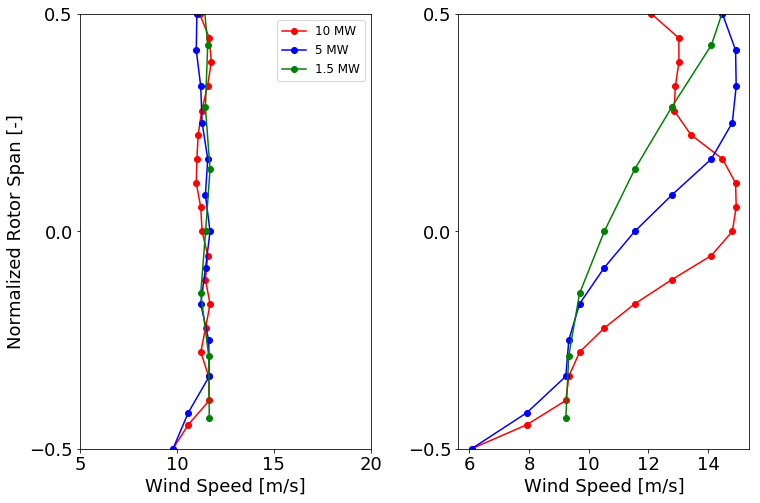

In [34]:
nrs_10 = []
u_10 = []
nrs_5 = []
u_5 = []
nrs_1 = []
u_1 = []

# Mixed Period
for h,u in zip(z_int_m,u_int_m):
    # 10 MW
    if h >= 30 and h<= 210:
        nrs_z = (h - 120)/180
        nrs_10 = np.append(nrs_10,nrs_z)
        u_10 = np.append(u_10,u)
    # 5 MW
    if h >= 30 and h<= 150:
        nrs_z = (h - 90)/120
        nrs_5 = np.append(nrs_5,nrs_z)
        u_5 = np.append(u_5,u)
    # 1.5 MW
    if h >= 50 and h<= 120:
        nrs_z = (h - 80)/70
        nrs_1 = np.append(nrs_1,nrs_z)
        u_1 = np.append(u_1,u)

        
nrs_10_l = []
u_10_l = []
nrs_5_l = []
u_5_l = []
nrs_1_l = []
u_1_l = []

# Mixed Period
for h,u in zip(z_int,u_int):
    # 10 MW
    if h >= 30 and h<= 210:
        nrs_z = (h - 120)/180
        nrs_10_l = np.append(nrs_10_l,nrs_z)
        u_10_l = np.append(u_10_l,u)
    # 5 MW
    if h >= 30 and h<= 150:
        nrs_z = (h - 90)/120
        nrs_5_l = np.append(nrs_5_l,nrs_z)
        u_5_l = np.append(u_5_l,u)
    # 1.5 MW
    if h >= 50 and h<= 120:
        nrs_z = (h - 80)/70
        nrs_1_l = np.append(nrs_1_l,nrs_z)
        u_1_l = np.append(u_1_l,u)
        
#------------------------------------------#
        
fig = plt.figure(figsize=(4*3,8))
ax  = fig.add_subplot(1,2,1)

ax.plot(u_10,nrs_10,'-or',label='10 MW')
ax.plot(u_5,nrs_5,'-ob',label='5 MW')
ax.plot(u_1,nrs_1,'-og',label='1.5 MW')
## ----- Turbine Data


plt.legend(loc='best',fontsize=12)

ax.set_xlabel("Wind Speed [m/s]")
ax.set_ylabel("Normalized Rotor Span [-]")

ax.set_xlim([5,20])
ax.set_ylim([-0.5,0.5])
ax.set_yticks([-0.5, 0 , 0.5])

ax2  = fig.add_subplot(1,2,2)

ax2.plot(u_10_l,nrs_10_l,'-or',label='10 MW')
ax2.plot(u_5_l,nrs_5_l,'-ob',label='5 MW')
ax2.plot(u_1_l,nrs_1_l,'-og',label='1.5 MW')
ax2.set_ylim([-0.5,0.5])
ax2.set_xlabel("Wind Speed [m/s]")
ax2.set_yticks([-0.5, 0 , 0.5])



fig.subplots_adjust(wspace=0.3)
fig.savefig("../NormalizedWindSpeed.png",bbox_inches="tight",dpi=500)
        

# plot

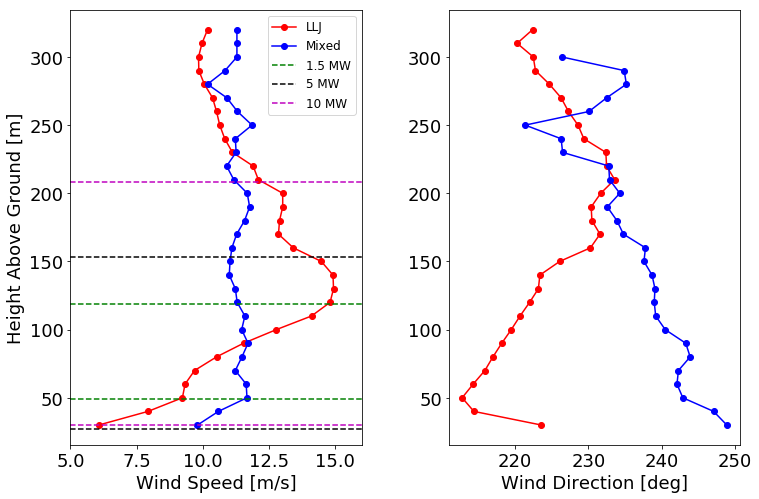

In [17]:
fig = plt.figure(figsize=(4*3,8))
ax  = fig.add_subplot(1,2,1)

ax.plot(u_nona,z_nona,'-or',label='LLJ')
#ax.plot(u_nona_m,z_nona_m,'-ob',label='Mixed')
ax.plot(u_int_m,z_int_m,'-ob',label='Mixed')
## ----- Turbine Data
#---1.5 MW
ax.axhline(y=49,color = 'g', linestyle = '--',label='1.5 MW' )
ax.axhline(y=119,color = 'g', linestyle = '--' )
#---5 MW
ax.axhline(y=27,color = 'k', linestyle = '--',label='5 MW'  )
ax.axhline(y=153,color = 'k', linestyle = '--' )
#---10 MW
ax.axhline(y=30,color = 'm', linestyle = '--',label='10 MW'  )
ax.axhline(y=208,color = 'm', linestyle = '--' )


plt.legend(loc='best',fontsize=12)

ax.set_xlabel("Wind Speed [m/s]")
ax.set_ylabel("Height Above Ground [m]")
#.set_title("{0:02d}:{1:02d} UTC".format(hour,minute))
ax.set_xlim([5,16])
#ax.set_xticks([6,10,15])

#
#
#

tmp = df.loc[idx][["wind direction","height"]].set_index("height").astype("float")
tmp_m = df.loc[idx_m][["wind direction","height"]].set_index("height").astype("float")

ax2  = fig.add_subplot(1,2,2)
ax2.plot(tmp.values,tmp.index,'-or',label=idx)
ax2.plot(tmp_m.values,tmp_m.index,'-ob',label=idx)

ax2.set_xlabel("Wind Direction [deg]")



fig.subplots_adjust(wspace=0.3)
#fig.savefig("../windspeed_direction.png",bbox_inches="tight",dpi=500)

## Normalized Rotor Span

In [ ]:


fig = plt.figure(figsize=(4*3,8))
ax  = fig.add_subplot(1,2,1)

ax.plot(u_nona,z_nona,'-or',label='LLJ')
#ax.plot(u_nona_m,z_nona_m,'-ob',label='Mixed')
ax.plot(u_int_m,z_int_m,'-ob',label='Mixed')


## ----- Turbine Data
#---1.5 MW
ax.axhline(y=49,color = 'g', linestyle = '--',label='1.5 MW' )
ax.axhline(y=119,color = 'g', linestyle = '--' )
#---5 MW
ax.axhline(y=27,color = 'k', linestyle = '--',label='5 MW'  )
ax.axhline(y=153,color = 'k', linestyle = '--' )
#---10 MW
ax.axhline(y=30,color = 'm', linestyle = '--',label='10 MW'  )
ax.axhline(y=208,color = 'm', linestyle = '--' )


plt.legend(loc='best',fontsize=12)

ax.set_xlabel("Wind Speed [m/s]")
ax.set_ylabel("Height Above Ground [m]")
#.set_title("{0:02d}:{1:02d} UTC".format(hour,minute))
ax.set_xlim([5,16])
#ax.set_xticks([6,10,15])

#
#
#

tmp = df.loc[idx][["wind direction","height"]].set_index("height").astype("float")
tmp_m = df.loc[idx_m][["wind direction","height"]].set_index("height").astype("float")

ax2  = fig.add_subplot(1,2,2)
ax2.plot(tmp.values,tmp.index,'-or',label=idx)
ax2.plot(tmp_m.values,tmp_m.index,'-ob',label=idx)

ax2.set_xlabel("Wind Direction [deg]")



fig.subplots_adjust(wspace=0.3)
#fig.savefig("../windspeed_direction.png",bbox_inches="tight",dpi=500)

# ensure that wind direction is centered at 270, for turbsim purposes

In [10]:
tmp  = df.loc[idx][["wind direction","height"]].set_index("height").astype("float")
mean = tmp.loc[:221].mean()
tmp  = tmp-mean+0

In [11]:
wdir_nona = np.squeeze(tmp.values)[~np.isnan(u)]

In [12]:
wdir_int = np.interp(z_int,z_nona,wdir_nona)

# prepare to save 

In [13]:
user_profile = pd.DataFrame({"Height":z_int,"Wind Speed":u_int,"Wind Direction":wdir_int,"Standard Deviation":wdir_int*0,"Length Scale":wdir_int*0})

In [14]:
user_profile = user_profile.set_index("Height").round(2)

In [15]:
user_profile

,Wind Speed,Wind Direction,Standard Deviation,Length Scale
Height,,,,
30.0,6.07,0.02,0.0,0.0
40.0,7.93,-9.18,-0.0,-0.0
50.0,9.23,-10.78,-0.0,-0.0
60.0,9.33,-9.28,-0.0,-0.0
70.0,9.69,-7.68,-0.0,-0.0
80.0,10.52,-6.58,-0.0,-0.0
90.0,11.54,-5.38,-0.0,-0.0
100.0,12.78,-4.08,-0.0,-0.0
110.0,14.11,-2.88,-0.0,-0.0


In [16]:
fout = "./USR_{0:%Y-%m-%d_%H-%M}.txt".format(idx)
user_profile.to_csv(fout,sep="\t",line_terminator='\n',float_format="%5.2f")

In [17]:
len(user_profile)

30

In [18]:
fout

'./USR_2017-02-17_14-40.txt'